In [1]:
%%time
#run to import in all libraries and methods


%run -i 'nlp_implementation.py' #imports packages and methods

main = "https://www.happyscribe.com"                
url="https://www.happyscribe.com/public/lex-fridman-podcast-artificial-intelligence-ai"
podcast_host = "Lex Fridman"

print("done")

done
CPU times: user 11.1 s, sys: 1.46 s, total: 12.5 s
Wall time: 13.2 s


In [7]:
%%time
#downloading html with given podcast_html.txt file

r = requests.get(url)
soup = BeautifulSoup(open("Archive/text_files/htmlstuff.txt").read(), 'html.parser') #html for podcast channel
podcast_name = soup.find(class_="hsp-podcast-info").find("h1").text.replace(" ","_") #extract each podcast info
podcast_name = "Lex_Fridman_Podcast3"
with concurrent.futures.ThreadPoolExecutor(max_workers = 20) as executor:
    result = [executor.submit(write_specific, main, tag.attrs["href"], podcast_name) for tag in soup.find_all("a",class_="hsp-card-episode")]
for future in concurrent.futures.as_completed(result):
    print(future.result())
    
# write_specific(main, tag.attrs["href"], podcast_name)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
CPU times: user 14 s, sys: 719 ms, total: 14.8 s
Wall time: 1min 15s


In [5]:
%%time
#convert file of podcasts to list of docs and docbin and write to disk

# %run -i 'nlp_implementation.py'
podcast_name = "2Lex"
# os.listdir(podcast_name)
onlyfiles = folder_to_filelist(podcast_name)
# print(onlyfiles[0]) #works

doc_bin = DocBin(store_user_data=True) #docbin container for serialization
docs = [] #list of docs 
print("starting")
for doc, name in nlp.pipe(onlyfiles, as_tuples=True): #piping all collection of docs to make doclist and docbin
    #each doc contians hostname, guest, title, entities mentioned, and summary
    name = re.split("[.\|]",name)[:-1]
    name=name[1:] if name[0][1:].isdigit() else name # store name of guest and topic, add to doc user data
    
    doc.user_data["host"] = podcast_host
    doc.user_data["guest"]= str(name[0]).replace("_"," ")
    doc.user_data["title"]= str(name[1]).replace("_"," ")
    doc.user_data["entis"] = [(ent.text, ent.label_) for ent in doc.ents]
    doc = keep_ents(doc) #extract and save all entities by filtering entity extraction
    docs.append(doc)
    doc_bin.add(doc) #add doc to list and bin
print("done")    
with open("cucumber/all_doc.bin", "wb") as f: #write bytestream to first_doc.bin
    f.write(doc_bin.to_bytes())

starting


/ilab/users/hs884/.local/lib/python3.8/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /ilab/users/hs884/.local/lib/python3.8/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


done
CPU times: user 2min 45s, sys: 1min, total: 3min 45s
Wall time: 5min 7s


In [2]:
%%time
#loading in previous bytestreams, needs 2 since 2 podcast folders edit later
with open("cucumber/all_doc.bin", "rb") as w: 
    new_docs1 = DocBin(store_user_data=True).from_bytes(w.read())
docs1 = list(new_docs1.get_docs(nlp.vocab))
with open("cucumber/first_doc.bin", "rb") as w: #loading in
    new_docs1 = DocBin(store_user_data=True).from_bytes(w.read())
docs1 += list(new_docs1.get_docs(nlp.vocab))

print(docs1[0].user_data["books"])

Deep Work


/ilab/users/hs884/.local/lib/python3.8/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /ilab/users/hs884/.local/lib/python3.8/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Bible
Bible
Pollyanna
Ph.D.
PhD
PhD
Ph.D.
The Verge
Denial of Death
The Year of Magical Thinking
Bible
Bible
BibleBible
Bible

BibleBible

Write Me a Poem
Hitchhiker’s Guide
The Worldly Philosophers
Sing Me
The Piano Man Nice
the Measure of Intelligence
Ph.D.
Ph.D.
Ph.D.
Top Gun
Tom Cruise
Strange Land and YouTube
Top Gun
Top Gun
E.T. and Close Encounters
The Bottom Line
Project Blue Book
Project Blue Book
Star Trek
Ph.D.
A Project to Find the Fundamental Theory of Physics
A New Kind of Science
The Innovators
Bible
Bible
Bible
Dune
Uptown Girl
Uptown Girl
The Republic
Ender’s Game
Ender’s Game
Star Trek
Star Trek
the The Dictionary of Curious and Interesting Numbers
Deep Questions
The War of Art
Trump
Cuddle Parties
The Crowd
A Course in Miracles
Your Welcome
Trump
Apprentice
Birth of a Nation
Superman
Superman
Superman
The Origin of Species
Deep Work
Star Trek
Ph.D.
Dune
Dune
Yudkowsky
Candy Crush
The Metamorphosis of Prime Intellect
a MacBook Air
Atlas Shrugged
Bible
Ph.D.
Hallelujah

In [ ]:
att_to_csv(docs1, "people") #for each category of ents, generate csv files for ents corresponding to people
# att_to_csv(docs1, "places")
# att_to_csv(docs1, "books")
# print(sorted(set([item for sublist in docs1 for item in sublist.user_data["people"]])))

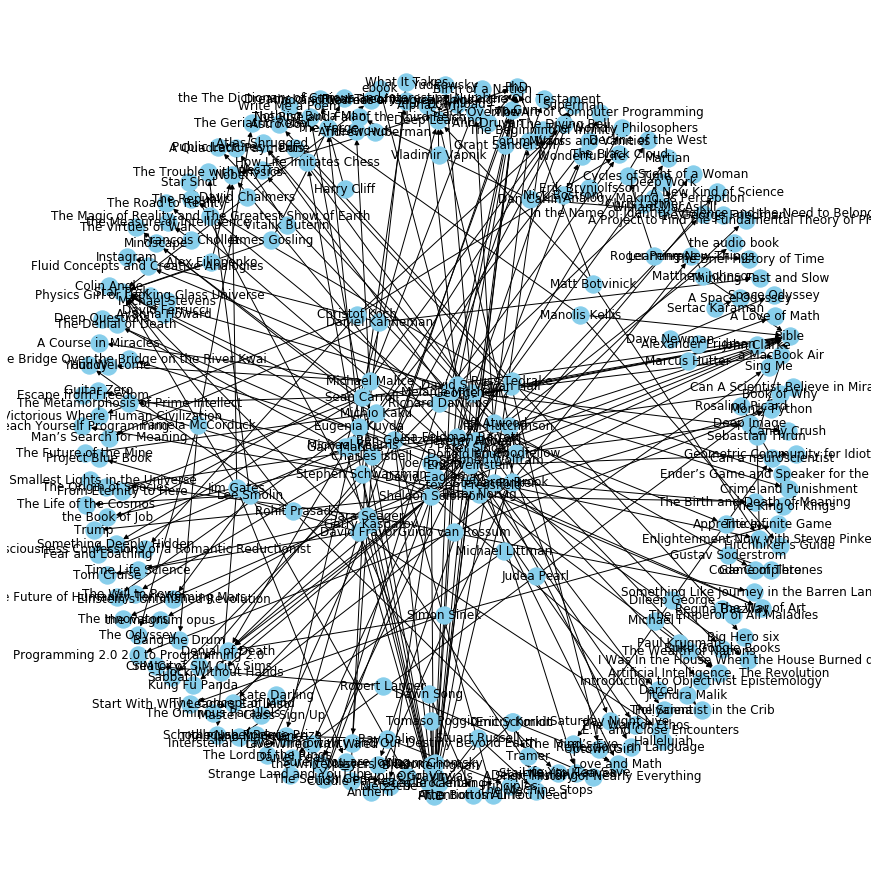

In [2]:
#generate megagraph for book ents
edges = pd.read_csv("booksEdges.csv", sep=',').drop("id", axis=1).values.tolist()
nodes = pd.read_csv('booksNodes.csv',sep=',').set_index("id").to_dict("index")

source = [nodes.get(e[0])["name"] for e in edges]
target = [nodes.get(e[1])["name"] for e in edges]
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':np.ones(len(source))})
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#following are other example graphviews

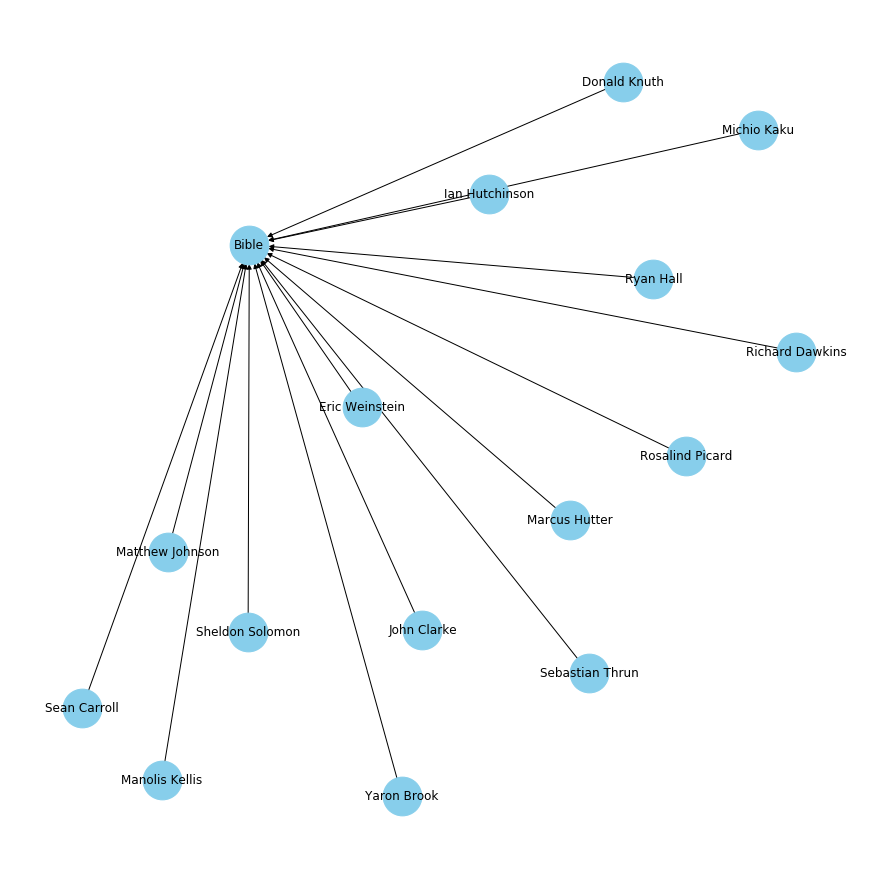

In [3]:
G=nx.from_pandas_edgelist(kg_df[kg_df['target']=="Bible"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes



nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['source']=="Matthew Johnson"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes



nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
G=nx.from_pandas_edgelist(kg_df[(kg_df['source']=="Matthew Johnson" )| (kg_df['source']=="Ryan Hall")], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes



nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
G=nx.from_pandas_edgelist(kg_df[(kg_df['target']=="Crime and Punishment" )| (kg_df['target']=="Atlas Shrugged")], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes



nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
wikipedia.summary("Yaron Brook", sentences=3)
wikipedia.summary("George Hotz", sentences=3)
wikipedia.summary("Atlas Shrugged", sentences=5)